In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1번 문제: Probability Mass function(PMF)

In [2]:
stones = ['Space', 'Reality', 'Mind', 'Time', 'Power', 'Soul']
stones_scores = dict(zip(stones, range(1, 7))) # {'Space': 1, 'Reality': 2, 'Mind': 3, 'Time': 4, 'Power': 5, 'Soul': 6}
print(stones_scores)

### start ###

{'Space': 1, 'Reality': 2, 'Mind': 3, 'Time': 4, 'Power': 5, 'Soul': 6}


In [3]:
board = [[0]*6 for _ in range(6)]
for i in range(6):
    for j in range(6):
        board[i][j] = list(stones_scores.values())[i] + list(stones_scores.values())[j]

In [4]:
# Probability Mass Function: 이산형 확률 분포
def PMF(sample_space):
    board = [[0]*6 for _ in range(6)]
    for i in range(6):
        for j in range(6):
            board[i][j] = list(stones_scores.values())[i] + list(stones_scores.values())[j]
    
    count = 0
    for i in range(6):
        for j in range(6):
            if board[i][j] == sample_space:
                count += 1
            else:
                continue
    return count / 36

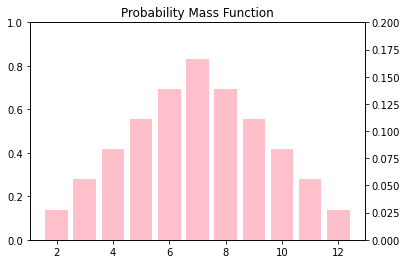

In [5]:
def All_Probability():
    array = []
    labels = []
    for i in range(2, 13):
        array.append(PMF(i))
        labels.append(i)
    
    # 왼쪽 y축
    plt.ylim(0, 1)
    plt.twinx()
    # 오른쪽 y축
    plt.ylim(0, 0.2)
    plt.bar(labels, array, color='pink')
    plt.title('Probability Mass Function')
    plt.show()
All_Probability()

### 2번 문제: PMF estimation

In [464]:
def gen_data(func): # 입력된 PMF를 기반으로 data를 생성하는 함수
    num_data=10000
    x = np.linspace(0,99,100)
    
    # func의 argument는 수정 가능
    p = func(x)
    
    error= 1-np.sum(p)
    if error<0.1 and error >= 0:
        p+=error/len(p)
    else:
        print("error:",error," p의 총합이 1이 안됩니다.")
        return -100
    
    g_data = np.random.choice(x,num_data,p=p,replace=True)
    return g_data

def test(data, func):
    error=0
    test_num = 1000
    for i in range(test_num):
        error += np.mean(np.abs(np.sort(data)-np.sort(gen_data(func))))
    
    print("error:",error/test_num)
    return 

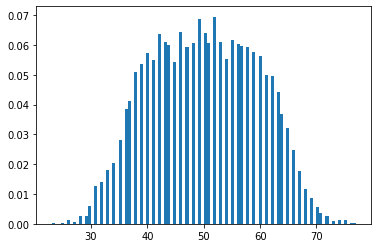

In [465]:
data = np.load("data.npy")
_ = plt.hist(data, 100, density=True)

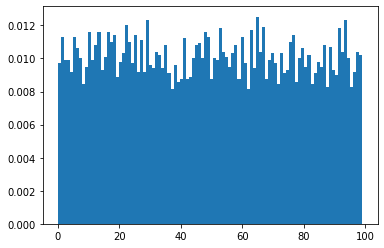

In [466]:
def func(x):
    return np.zeros(100)+1/100

my_data = gen_data(func)
_ = plt.hist(my_data, 100, density=True)

In [467]:
test(data, func) # uniform

error: 17.02218299999999


## Binomial RV

In [483]:
def gen_data(func): # 입력된 PMF를 기반으로 data를 생성하는 함수
    num_data=10000
    x = np.linspace(0,99,100)
    
    # func의 argument는 수정 가능
    p = func(x)
    
    error= 1-np.sum(p)
    if error<0.1 and error >= 0:
        p+=error/len(p)
    else:
        print("error:",error," p의 총합이 1이 안됩니다.")
        return -100
    
    g_data = np.random.choice(x,num_data,p=p,replace=True)
    return g_data

def test(data, func):
    error=0
    test_num = 1000
    for i in range(test_num):
        error += np.mean(np.abs(np.sort(data)-np.sort(gen_data(func))))
    
    print("error:",error/test_num)
    return 

def test2(data, func):
    error=0
    test_num = 1000
    for i in range(test_num):
        error += np.mean(np.abs(np.sort(data)-np.sort(gen_data(func))))
    
    #print("error:",error/test_num)
    return error/test_num

In [484]:
def factorial(n):
    if n > 1:
        return n * factorial(n-1)
    else:
        return 1

error: 0.14264359999999995


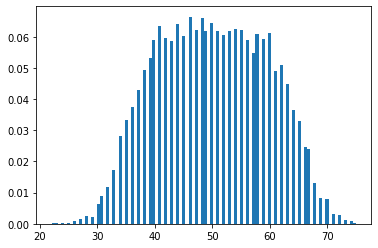

In [836]:
from scipy.stats import nbinom
def Binomial(x):
    # x = 0~99
    n = 100
    p = 0.4
    result = [0 for _ in range(100)]
    for k in x:
        result[int(k)] += ((factorial(n) / (factorial(k) * factorial(n - k))) * (p**k) * ((1 - p)**(n - k)))
        
    # x = 0~99
    n = 100
    p = 0.5
    for k in x:
        result[int(k)] += ((factorial(n) / (factorial(k) * factorial(n - k))) * (p**k) * ((1 - p)**(n - k)))
        
    # x = 0~99
    n = 100
    p = 0.6
    for k in x:
        result[int(k)] += ((factorial(n) / (factorial(k) * factorial(n - k))) * (p**k) * ((1 - p)**(n - k)))
    return [x / 3 for x in result]

my_data = gen_data(Binomial)
test(data, Binomial) # uniform
_ = plt.hist(my_data, 100, density=True)